<a href="https://colab.research.google.com/github/gimb99/gbgTPDI/blob/develop/ejercicioIntegrador2/ejercicioIntegrador2_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En esta actividad, vamos a poner en práctica todo lo que aprendimos sobre procesamiento de imágenes para crear un proyecto.

Objetivo: El objetivo de este proyecto es que utilicen procedimientos básicos de procesamiento de imágenes para leer una imagen, aplicarle mejoras, segmentar objetos y mostrar los resultados en una presentación visual.

Duración: Tenemos 1 hora para completar este desafío.

##Preparación:

Entorno: Vamos a usar Google Colab, que ya tiene todo lo que necesitamos instalado.

##Imágenes:

Les voy a proporcionar un conjunto de imágenes de ejemplo para que elijan la que más les guste. Hay de todo un poco: paisajes, objetos, retratos... ¡para que tengan variedad!

Si prefieren, ¡pueden usar sus propias fotos! Solo recuerden elegir una imagen con buena iluminación y calidad para que los resultados sean los mejores.

Google Colab: Este cuaderno ya está listo para que trabajen. Solo tienen que seguir las instrucciones y completar el código en los espacios indicados.

Pasos a seguir:

##1. ¡Empecemos importando las bibliotecas!
Lo primero que vamos a hacer es importar las herramientas que vamos a utilizar.

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 2. Leyendo y viendo nuestra imagen
Subir la imagen: Si van a usar una foto propia, súbanla a Google Colab. Para hacerlo, hagan clic en el ícono de la carpeta en la barra lateral izquierda, luego en el ícono de "Subir" y seleccionen su archivo.

Leer la imagen: Con cv2.imread(), vamos a leer la imagen que eligieron. Recuerden que OpenCV lee las imágenes en formato BGR, así que la vamos a convertir a RGB para poder verla bien con Matplotlib.

Mostrar la imagen original: Usaremos matplotlib.pyplot para ver la imagen tal como es al principio.

In [7]:
!wget https://raw.githubusercontent.com/gimb99/gbgTPDI/refs/heads/develop/ejercicioIntegrador2/sample2.jpg
idImage = "sample2.jpg"

--2025-04-30 22:29:56--  https://raw.githubusercontent.com/gimb99/gbgTPDI/refs/heads/develop/ejercicioIntegrador2/sample2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175410 (171K) [image/jpeg]
Saving to: ‘sample2.jpg’

sample2.jpg         100%[===================>] 171.30K  --.-KB/s    in 0.03s   

2025-04-30 22:29:56 (5.01 MB/s) - ‘sample2.jpg’ saved [175410/175410]



In [8]:
imagenCrudo = cv2.imread(idImage)
#Validar si cargo bien
if imagenCrudo is None:
    raise ValueError("La imagen no se pudo cargar. Asegúrate de que la ruta es correcta.")

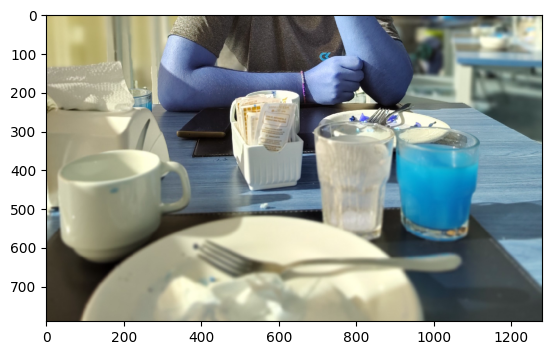

In [9]:
plt.imshow(imagenCrudo)
plt.show()

### Pre-procesamiento a RGB

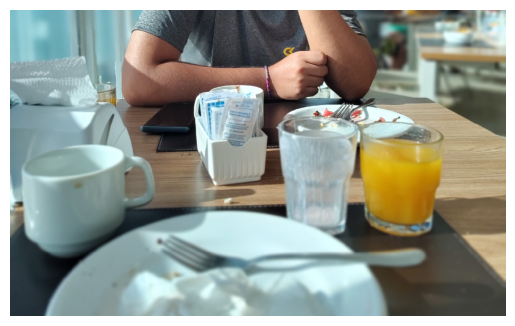

In [10]:
imagen = cv2.cvtColor(imagenCrudo, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(imagen)

### Pre-analisis de imagen

#### Histograma

In [11]:
def imhist3(X):
    (N, M, P) = X.shape  # Obtener dimensiones de la imagen
    n = 256  # Número de niveles de colores
    for p in range(3):  # Para cada canal de color
        h = np.zeros((256,))  # Crear un histograma vacío
        for i in range(N):  # Recorrer cada fila
            for j in range(M):  # Recorrer cada columna
                x = X[i, j, p]  # Obtener el valor del píxel
                h[x] += 1  # Incrementar el conteo en el histograma
        plt.figure(figsize=(30, 9))  # Tamaño de la figura
        plt.bar(range(n), h[0:n])  # Mostrar el histograma
        plt.title('Histograma del Canal ' + str(p))  # Título
        plt.show()  # Mostrar figura

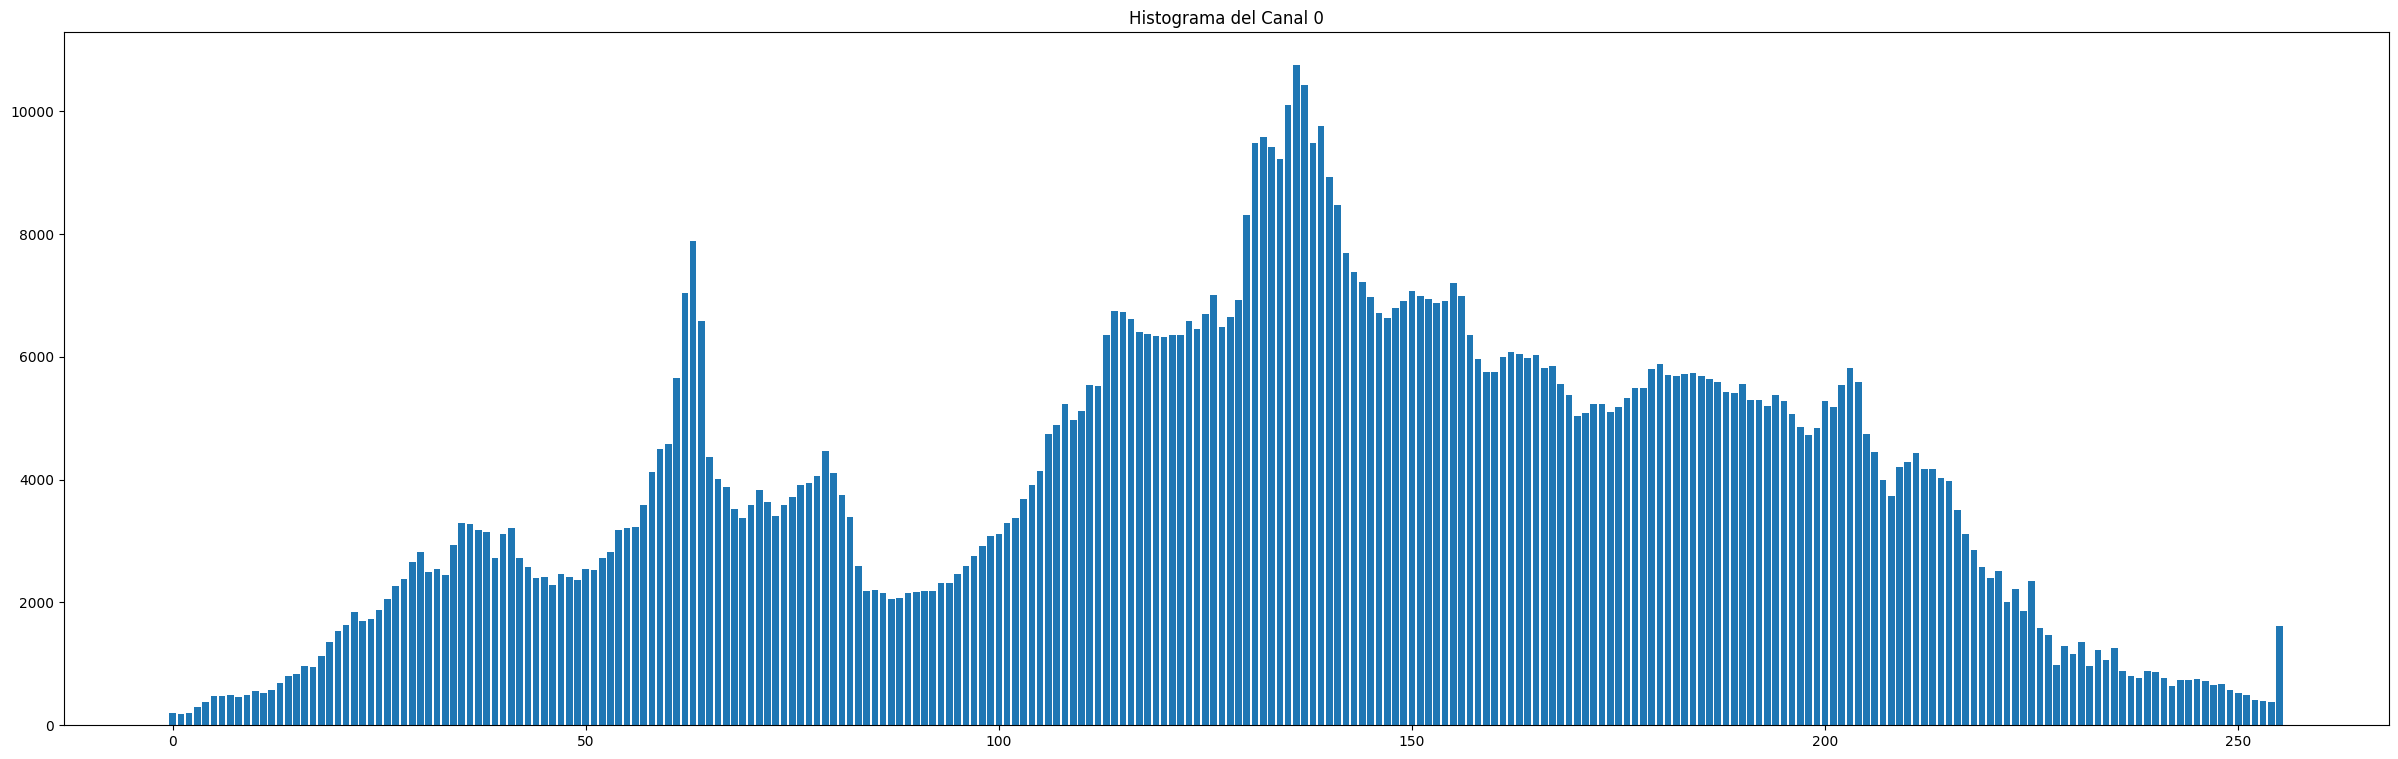

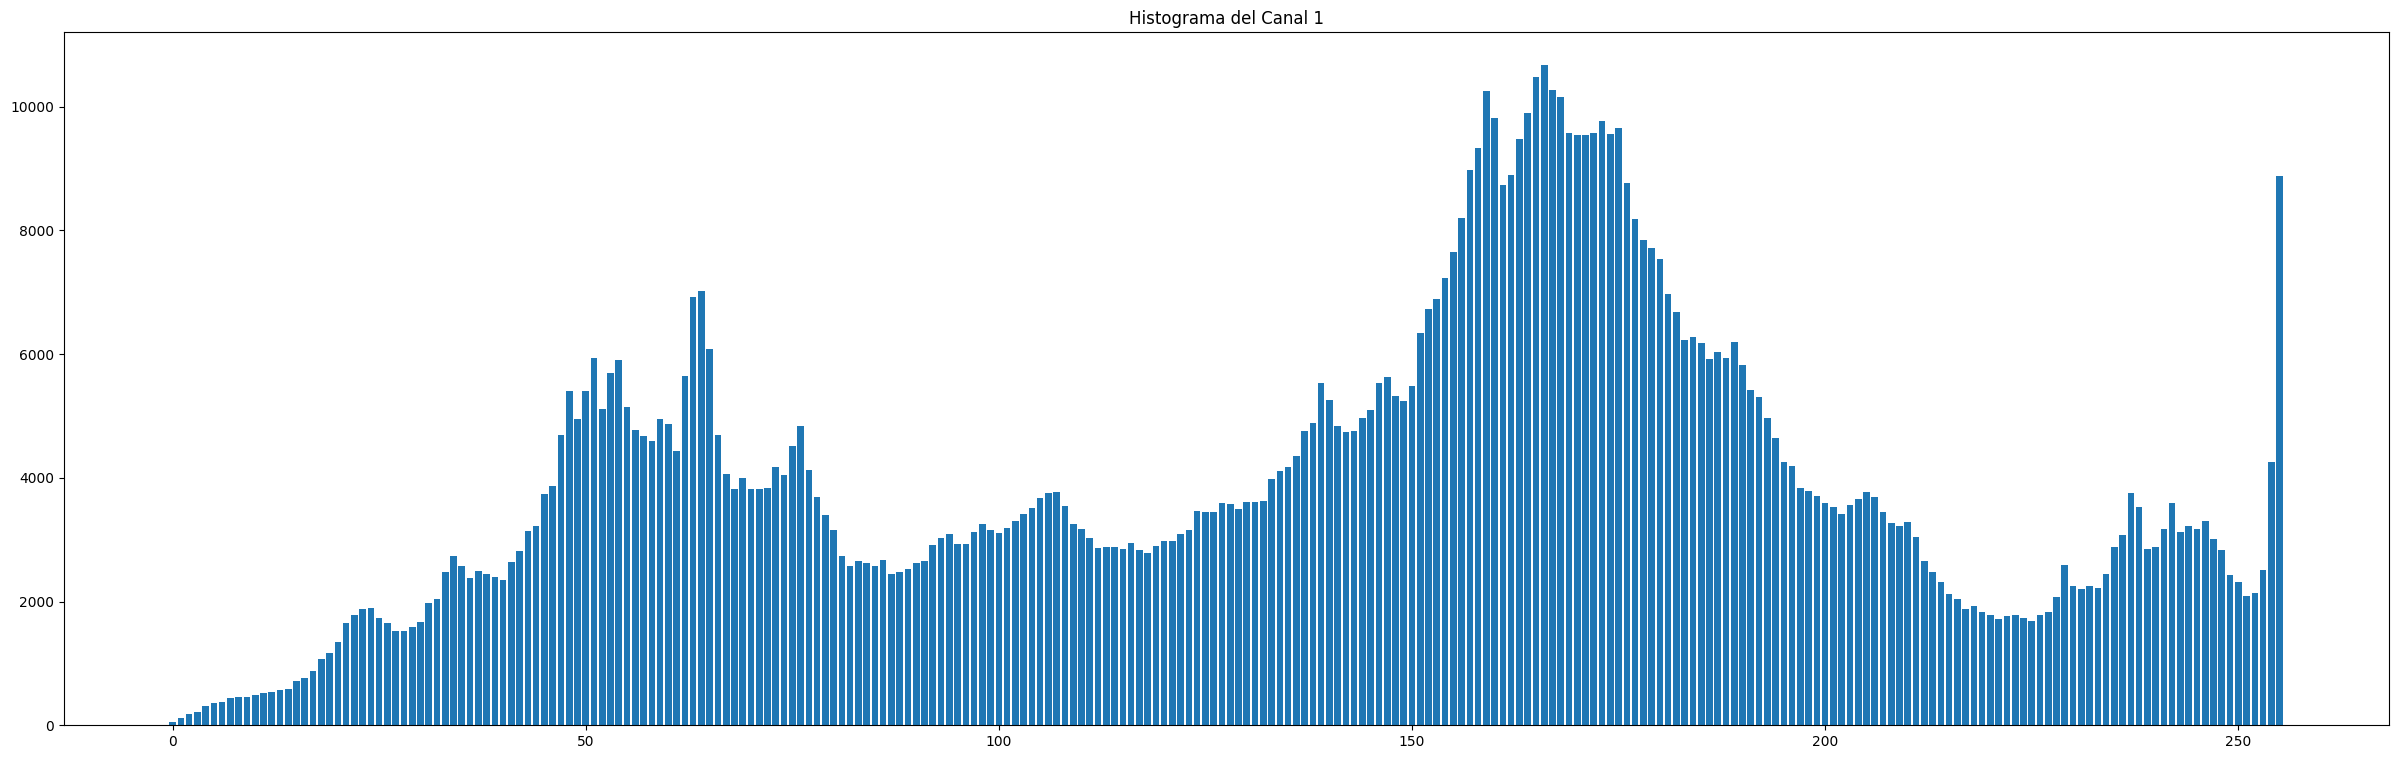

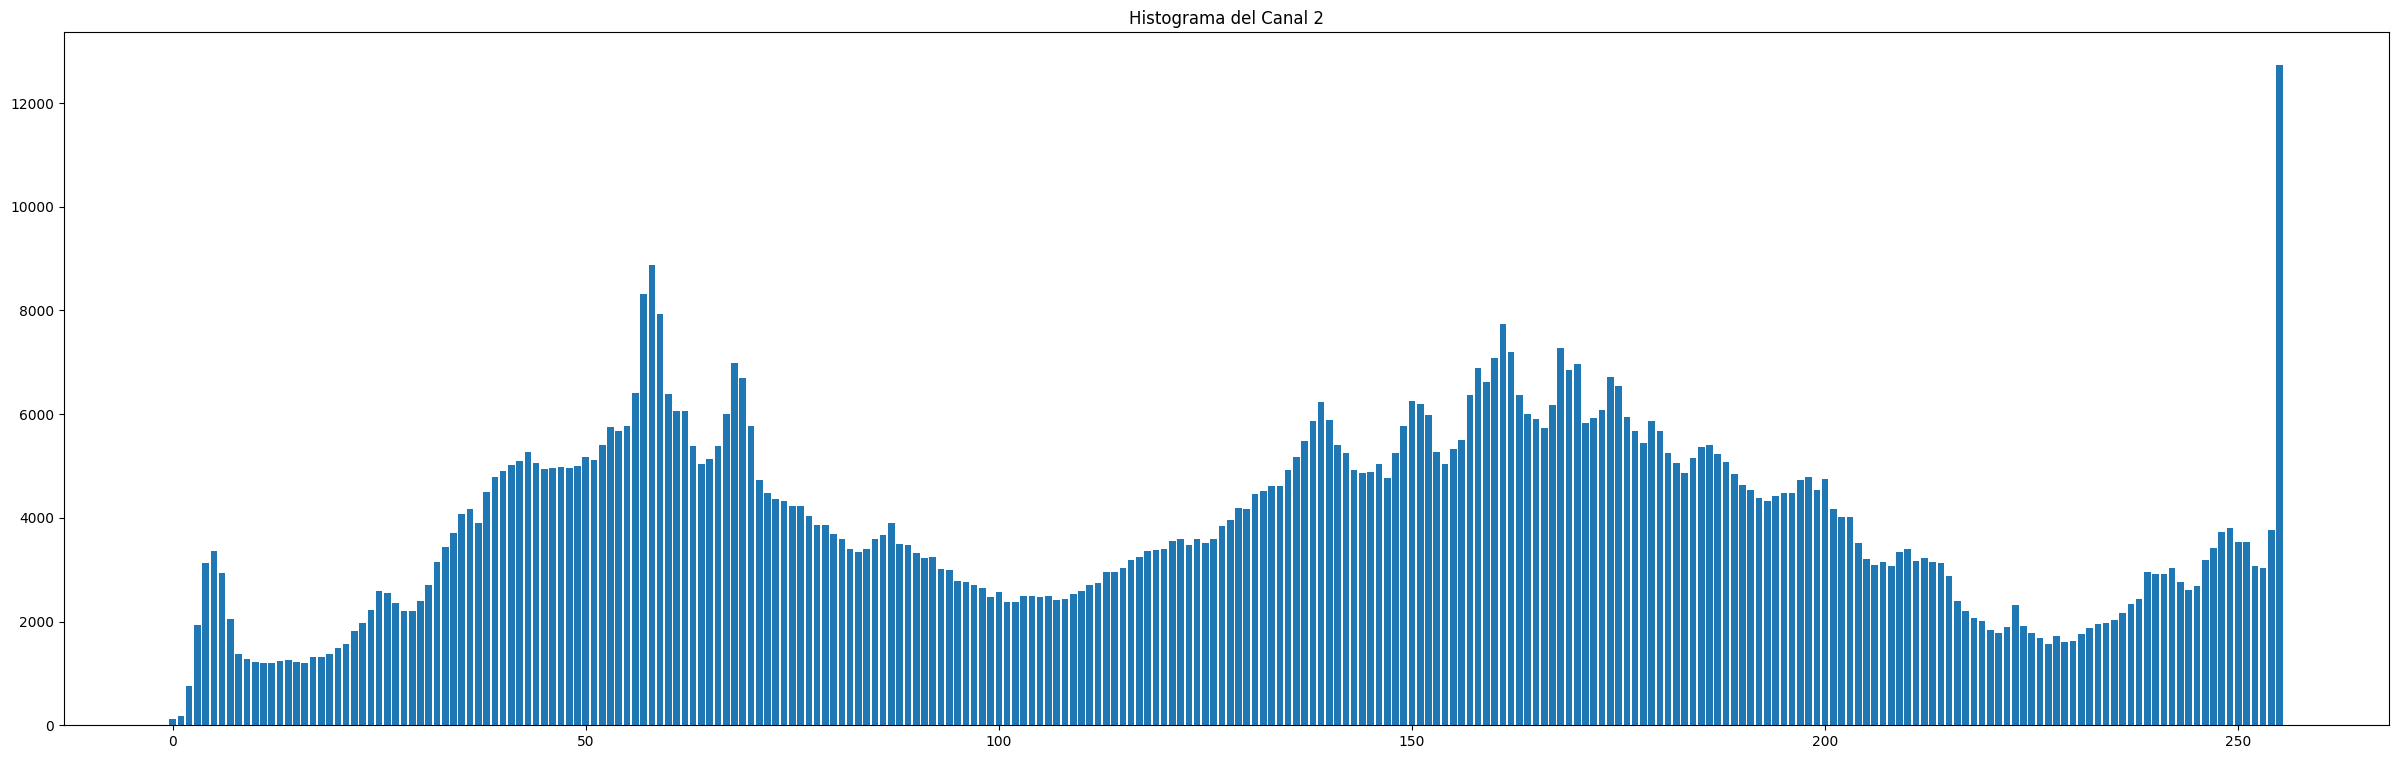

In [12]:
imhist3(imagen)  # Calcular y mostrar el histograma

Por pre-analisis, podemos darnos una idea que la imagen contiene mayores valores de frecuencia para los canales 0 y 1 (R y G)

##3. ¡Mejorando nuestra imagen!
Ahora vamos a aplicar un par de técnicas para que nuestra imagen se vea aún mejor:

Ajuste de brillo y contraste: Vamos a crear una función para modificar estos aspectos de la imagen.

Ecualización de histograma: Con cv2.equalizeHist(), vamos a mejorar el contraste de la imagen.

*Aclaración del coder: No es recomendable ecualizar cada canal de forma independiente porque puede alterar el balance de color original.*

In [23]:
imgBalanced = imagenCrudo.copy()  # Hacer una copia de la imagen original
imgBalanced[:, :, 0] = cv2.equalizeHist(imagen[:, :, 0])  # Ecualizar el canal Rojo
imgBalanced[:, :, 1] = cv2.equalizeHist(imagen[:, :, 1])  # Ecualizar el canal Verde
imgBalanced[:, :, 2] = cv2.equalizeHist(imagen[:, :, 2])  # Ecualizar el canal Azul

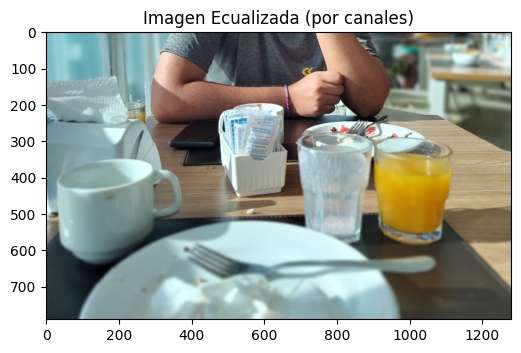

In [25]:
plt.figure(figsize=(6, 9))  # Tamaño de la figura
imgBalanced = cv2.cvtColor(imagenCrudo, cv2.COLOR_BGR2RGB)
plt.imshow(imgBalanced)  # Mostrar la imagen ecualizada
plt.title('Imagen Ecualizada (por canales)')  # Título
plt.show()  # Mostrar

##4. ¡A segmentar por color!
Ahora viene una parte muy interesante: vamos a separar objetos de la imagen por su color.

Convertir a HSV: Vamos a pasar la imagen de RGB a HSV (Hue, Saturation, Value) porque es más fácil definir rangos de color en HSV.

Definir el rango de color: Vamos a establecer los límites inferior y superior del color que queremos segmentar. En el ejemplo, segmentamos el color rojo de las flores. ¡Presten mucha atención acá! Van a tener que ajustar estos valores para su propia imagen.


Crear una máscara: Con cv2.inRange(), vamos a crear una máscara que nos indique qué píxeles están dentro del rango de color y cuáles no.

Elegimos el color amarillo (R y G)

In [34]:
imgHsv = cv2.cvtColor(imagen, cv2.COLOR_RGB2HSV)
limite_inferior = np.array([50, 50, 100])  # Rango inferior del color en HSV
limite_superior = np.array([255, 255, 130])  # Rango superior del color en HSV
mascara = cv2.inRange(imgHsv, limite_inferior, limite_superior)  # Crear una máscara para el color

Aplicar la máscara: Usaremos cv2.bitwise_and() para quedarnos solo con la parte de la imagen que corresponde al color que elegimos.

In [35]:
imagen_segmentada = cv2.bitwise_and(imagen, imagen, mask=mascara)  # Aplicar la máscara a la imagen original

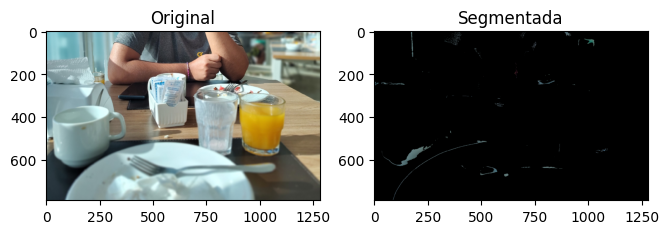

In [45]:
# Mostrar los resultados
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 2)
plt.imshow(imagen)
plt.title('Original')

plt.subplot(1, 3, 3)
plt.imshow(imagen_segmentada)
plt.title('Segmentada')
plt.show()

##5. ¡Dibujando y escribiendo sobre la imagen!
Para terminar, vamos a agregarle un poco de información a nuestra imagen segmentada.

Dibujar rectángulos: Con cv2.findContours() vamos a encontrar los contornos de los objetos que segmentamos, y con cv2.boundingRect() vamos a obtener las coordenadas para dibujar un rectángulo alrededor de ellos. Usaremos cv2.rectangle() para dibujar el rectángulo.

Agregar texto: Con cv2.putText(), vamos a agregar un texto que describa los objetos que segmentamos.

##6. Presentaciones preliminares

Cada uno/una de ustedes va a tener 5 minutos para mostrarnos su trabajo, que debe incluir:

La imagen original.

La imagen mejorada (ya sea con ajuste de brillo/contraste o ecualización de histograma).

La imagen segmentada.

Una explicación de todo el proceso, incluyendo:

La imagen que eligieron y por qué.

Los valores que usaron para ajustar el brillo y el contraste (si lo hicieron).

El rango de color HSV que eligieron para segmentar y por qué.

Cualquier dificultad que hayan tenido y cómo la resolvieron.

## Recursos

### Datasets Generales:

**[COCO](https://cocodataset.org/) (Common Objects in Context):** Este dataset es muy completo, con imágenes de objetos cotidianos en escenas complejas. Es ideal para practicar segmentación y reconocimiento de objetos.

**Ideas para el proyecto:** Segmentar diferentes objetos en una escena (personas, autos, animales) y analizar sus relaciones espaciales.


**[Open Images](https://storage.googleapis.com/openimages/web/index.html):** Un dataset masivo con millones de imágenes y anotaciones de objetos. Ofrece una gran variedad de temas y es excelente para proyectos más ambiciosos.

**Ideas para el proyecto:** Detectar y segmentar múltiples objetos en una imagen, o incluso intentar segmentar objetos dentro de un contexto específico (por ejemplo, segmentar diferentes tipos de árboles en un paisaje).


**[ImageNet](https://www.image-net.org/):** Este dataset contiene una gran cantidad de imágenes organizadas según la jerarquía de WordNet.

**Ideas para el Proyecto:** Los estudiantes pueden usar un subconjunto de ImageNet para segmentar y clasificar diferentes categorías de imágenes, como animales, vehículos o plantas.


### Datasets Específicos:

**[Flores](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html):** Datasets como Oxford Flowers 102 son perfectos para proyectos de segmentación por color, donde los estudiantes pueden aislar flores de diferentes tipos y colores.

**Ideas para el proyecto:** Segmentar flores de un color específico y luego usar técnicas de procesamiento de imágenes para analizar su forma o textura.


**[Rostros](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html):** Datasets como CelebA pueden usarse para proyectos de segmentación de características faciales o reconocimiento de rostros.

**Ideas para el proyecto:** Segmentar diferentes partes del rostro (ojos, nariz, boca) y analizar cómo cambian con las expresiones faciales.


**[Paisajes Urbanos](https://www.cityscapes-dataset.com/):** Cityscapes es ideal para segmentar elementos en entornos urbanos, como autos, peatones y edificios.

### Dónde Encontrar Más Datasets:

**[Kaggle](https://www.kaggle.com/datasets?search=image):** Esta plataforma ofrece una gran variedad de datasets de imágenes subidos por la comunidad, que pueden ser útiles para proyectos específicos.


**[Papers With Code](https://paperswithcode.com/datasets?mod=images):** Este sitio web recopila datasets utilizados en investigaciones de aprendizaje automático, incluyendo muchos datasets de imágenes.
Usa el código con precaución